In [1]:
import random
import math
import matplotlib.pyplot as plt
import pickle

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
samples = []

for i in range(100):
    m_w = random.randint(65, 100) + random.randint(-5, 5)
    m_h = random.randint(170, 190) + random.randint(-5, 5)
    w_w = random.randint(50, 70) + random.randint(-5, 5)
    w_h = random.randint(150, 175) + random.randint(-5, 5)
    m = [m_w, m_h, '남']
    w = [w_w, w_h, '여']
    samples.append(m)
    samples.append(w)

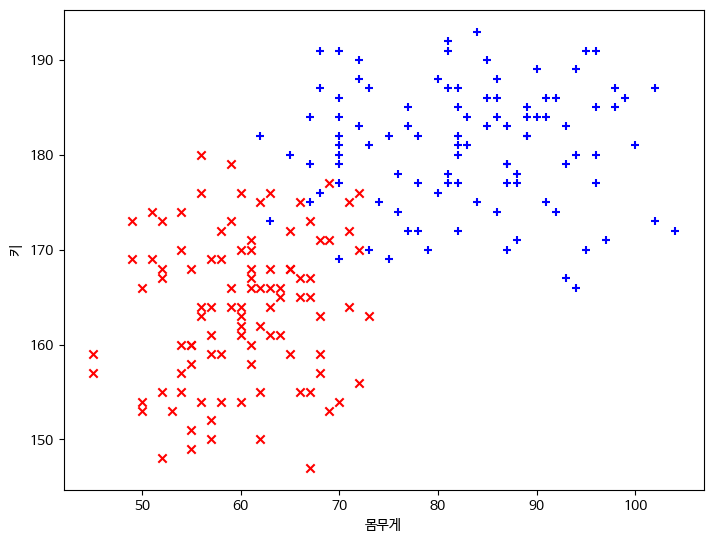

In [3]:
#samples
markers = {'남':'+', '여':'x'}
colors = {'남':'b', '여':'r'}
x = list(sample[0] for sample in samples)
y = list(sample[1] for sample in samples)
marker =list(markers[m] for m in list(sample[2] for sample in samples))
color =list(colors[m] for m in list(sample[2] for sample in samples))

fig_0 = plt.figure(0)
ax = fig_0.add_axes([0,0,1,1])
for index in range(len(samples)):
    ax.scatter(x = x[index], y = y[index],
                marker = marker[index], color = color[index])

ax.set_xlabel("몸무게"); ax.set_ylabel("키")
pickle.dump(fig_0, open("samples_plot", 'wb'))

fig_0.canvas.draw()

In [4]:
t_w = random.randint(65, 100)
t_h = random.randint(170, 190)
t = [t_w, t_h]

d_g = []
for i in samples:
    d = math.sqrt( (i[0]-t[0])**2 + (i[1]-t[1])**2 )
    s_t = [d, i[2]]
    d_g.append(s_t)

for i in range(len(d_g)):
    for j in range(i+1, len(d_g)):
        if d_g[i][0] > d_g[j][0]:
            temp = d_g[j]
            d_g[j] = d_g[i]
            d_g[i] = temp

k = 9
c_m = 0; c_w = 0
for i in range(k):
    if d_g[i][1] == "남":
        c_m = c_m +1
    elif d_g[i][1] == '여':
        c_w = c_w +1

#print(d_g)
if c_m > c_w:
    print("몸무게: {}, 키: {}이고 성별은 {}로 예측".format(t_w,t_h,"남"))
else:
    print("몸무게: {}, 키: {}이고 성별은 {}로 예측".format(t_w,t_h,"여"))


몸무게: 95, 키: 171이고 성별은 남로 예측


몸무게: 91, 키: 189이고 성별은 남로 예측


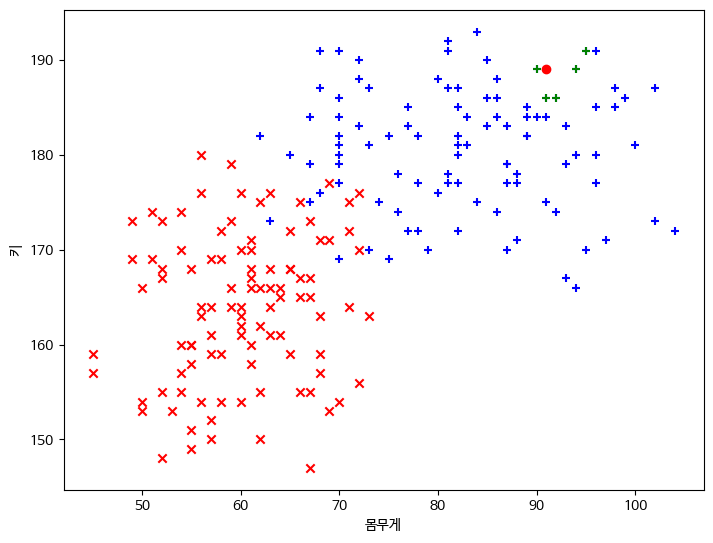

몸무게: 71, 키: 187이고 성별은 남로 예측


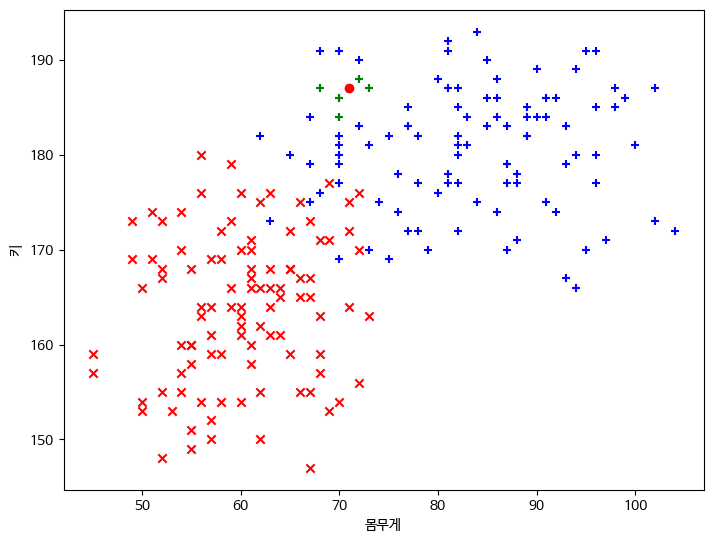

몸무게: 89, 키: 186이고 성별은 남로 예측


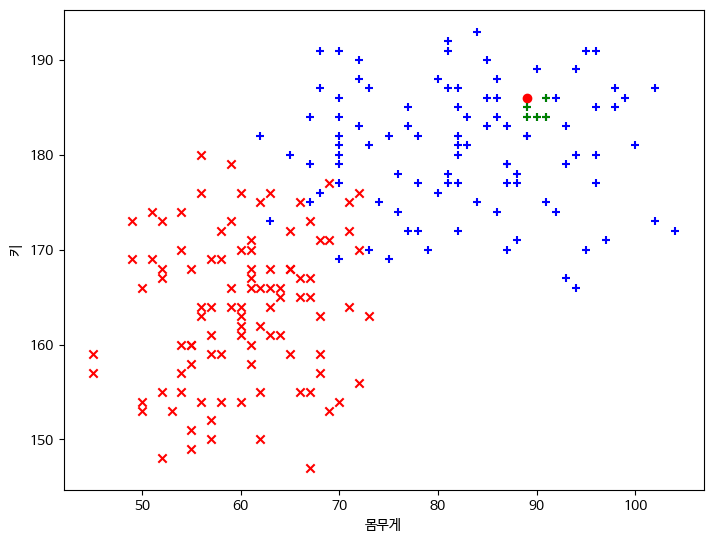

In [5]:
def _knn(samples, t, k=3):
    #거리 계산
    d_g = []
    for i in samples:
        d = math.sqrt( (i[0]-t[0])**2 + (i[1]-t[1])**2 )
        s_t = [d, i[2], [i[0], i[1]]]
        d_g.append(s_t)

    #거리 정렬
    for i in range(len(d_g)):
        for j in range(i+1, len(d_g)):
            if d_g[i][0] > d_g[j][0]:
                temp = d_g[j]
                d_g[j] = d_g[i]
                d_g[i] = temp

    #k개의 샘플로 예측
    c_m = 0; c_w = 0
    for i in range(k):
        if d_g[i][1] == "남":
            c_m = c_m +1
        elif d_g[i][1] == '여':
            c_w = c_w +1

    res = None
    if c_m > c_w:
        res = '남'
    else:
        res = '여'

    return res, d_g

for i in range(3):
    t_w = random.randint(65, 100)
    t_h = random.randint(170, 190)
    t = [t_w, t_h]
    k = 5
    res, d_g = _knn(samples, t, k = k)

    print("몸무게: {}, 키: {}이고 성별은 {}로 예측".format(t_w, t_h, res))

    figx = pickle.load(open("samples_plot", "rb"))
    figx.axes[0].scatter(x = t[0], y = t[1], marker = 'o', color = 'r')
    for i in range(k):
        figx.axes[0].scatter(x = d_g[i][2][0], y = d_g[i][2][1],
                             marker = markers[d_g[i][1]], color = 'g')

    #figx.canvas.draw()
    plt.show()


In [ ]:
a = [6, 2, 1, 5 ,4, 3, 7, 9, 12]

for i in range(len(a)-1):
    for j in range(i+1, len(a)):

        if a[i] < a[j]:
            temp = a[j]
            a[j] = a[i]
            a[i] = temp
        print(a[i], a[j])

print(a)

6 2
6 1
6 5
6 4
6 3
7 6
9 7
12 9
2 1
5 2
5 4
5 3
6 5
7 6
9 7
2 1
4 2
4 3
5 4
6 5
7 6
2 1
3 2
4 3
5 4
6 5
2 1
3 2
4 3
5 4
2 1
3 2
4 3
2 1
3 2
2 1
[12, 9, 7, 6, 5, 4, 3, 2, 1]
